# Förderhinweis

Dieses Dokument ist Teil des Lehrmaterials für die **Zusatzqualifikation KI und Maschinelles Lernen.** 

Die Entwicklung und Erprobung dieses Bildungsangebotes wurde vom Bundesministerium für Bildung und Forschung im Rahmen des InnoVET-Programms gefördert.

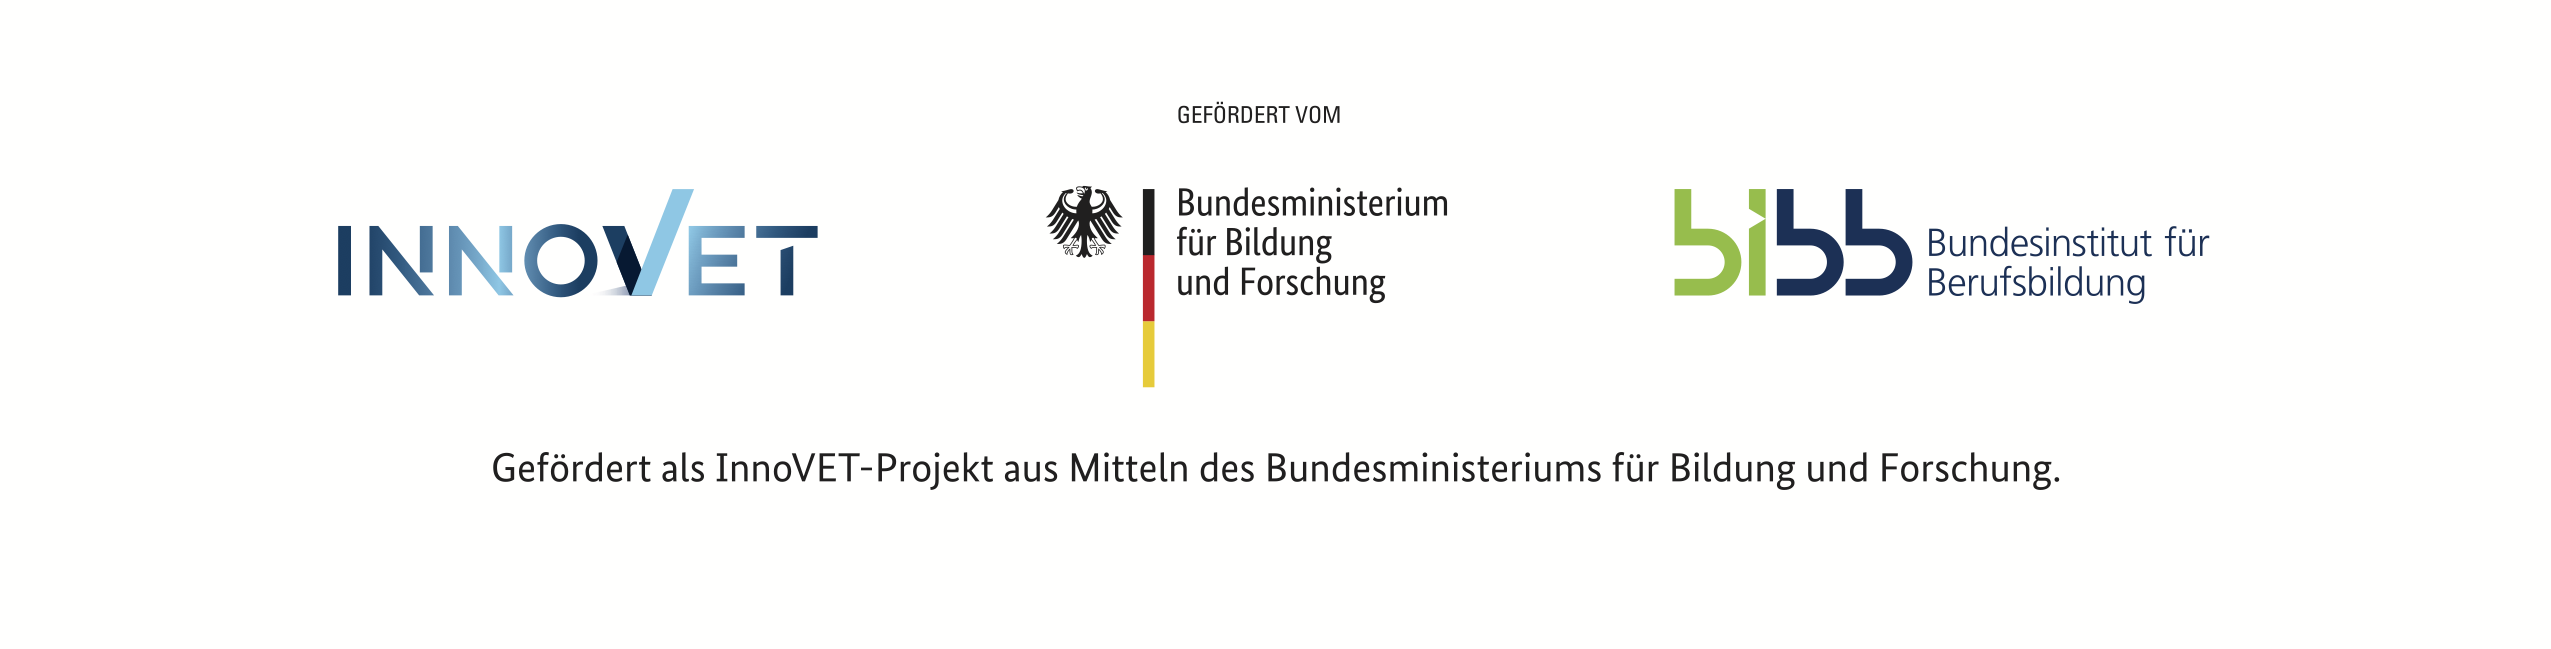

# Lizenzhinweis

Dieses Notebook "Lineare Regression" wurde von Antje Schweitzer, KI B3 / Universität Stuttgart, erstellt. 

Das Werk, mit Ausnahme der oben abgebildenten Förderlogos, ist lizenziert unter [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/deed.de) (Namensnennung 4.0 International)

# Lineare Regression

In diesem Notebook geht es darum, ein lineares Regressionsmodell für die Eisverkaufsdaten zu finden. Dafür werden zunächst Wetterdaten und Eisdaten geladen und zusammengeführt. 

## Daten laden und zusammenführen

In [ ]:
import pandas
# Wetterdaten laden
wetter_url = 'https://github.com/antje-schweitzer/wetterdaten/raw/main/wetterdaten.csv'
wetter = pandas.read_csv(wetter_url)


In [ ]:
# Eisdaten laden
eis_url = 'https://github.com/antje-schweitzer/eisverkauf2018/raw/main/eisverkauf.2018.csv'
eis = pandas.read_csv(eis_url)


In [ ]:
# DataFrames wetter und eis zusammenführen
# Spalte 'Datum' als Schlüssel nutzen
gesamtdaten = pandas.merge(wetter,eis,left_on='Datum',right_on='Datum')
gesamtdaten

,Datum,Max,Wolken,Wochentag,Portionen
0,2018-01-01,9.4,6.6,1,0.0
1,2018-01-02,6.9,7.6,2,0.0
2,2018-01-03,13.1,7.6,3,80.0
3,2018-01-04,12.5,7.7,4,35.0
4,2018-01-05,11.5,7.7,5,27.0
...,...,...,...,...,...
360,2018-12-27,2.9,7.5,4,0.0
361,2018-12-28,2.1,6.9,5,0.0
362,2018-12-29,5.0,7.9,6,0.0
363,2018-12-30,6.0,7.8,0,13.0


## Zusammenhang visualisieren

Hier ist der Code zum Erstellen der Diagramme aus den Folien zur linearen Regression: zunächst erstellten wir ein Streudiagramm, bei dem wir auf der x-Achse das Datum darstellen und auf der y-Achse die Verkäufe - dadurch visualisieren wir die Entwicklung der Verkaufszahlen im Laufe des Jahres.

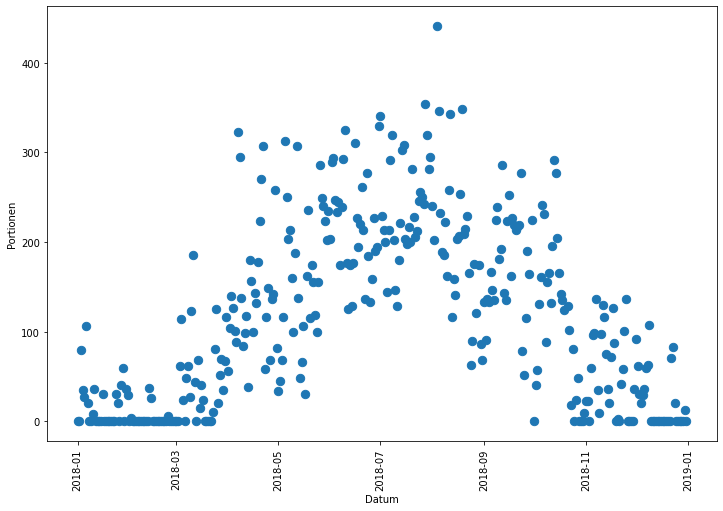

In [ ]:
# Spalte mit Datum von String in "echtes" Datum umwandeln
# dadurch bessere Darstellung der x-Achse
gesamtdaten['Datum'] = pandas.to_datetime(gesamtdaten['Datum'])

# Scatterplot für Eisverkäufe über die Zeit
# figsize=(12,8) bewirkt größeres Diagramm
# rot=90 bewirkt Drehung der Beschriftung auf der x-Achse um 90 Grad
# s=70 gibt die Größe der Punkte an
gesamtdaten.plot.scatter('Datum','Portionen',s=70,figsize=(12,8),rot=90)


Anschließend produzieren wir das Streudiagramm für den Zusammenhang zwischen Höchsttemperatur und verkauften Portionen. 

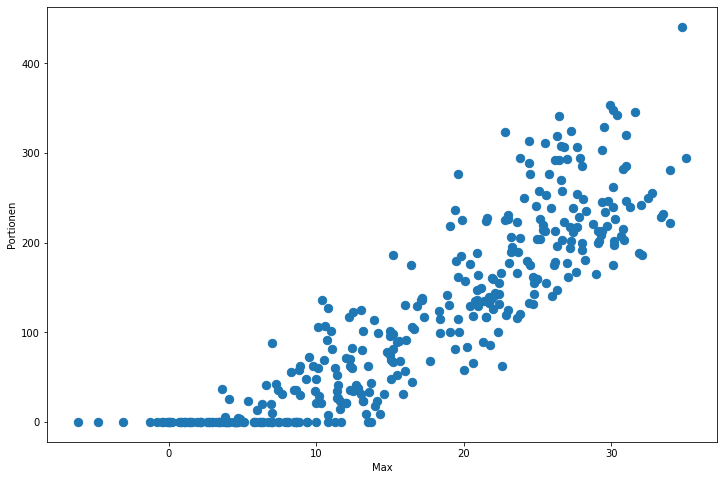

In [ ]:
gesamtdaten.plot.scatter('Max','Portionen',s=70,figsize=(12,8))

Den linearen Zusammenhang kann man mit bloßem Auge erkennen. Allerdings bilden die Punkte keine perfekte Linie. Das bestätigt auch die Korrelation - sie ist nicht perfekt. Die Korrelation kann man bei `pandas` mit der Methode `corr()` berechnen. Man bekommt dann die Korrelationen zwischen allen Spalten, die Zahlenwerte enthalten. 

Die Korrelation zwischen 'Max' und 'Portionen' findet man sowohl in der Zeile 'Max' unter 'Portionen' als auch umgekehrt in der Zeile 'Portionen' unter 'Max'. 

In [ ]:
gesamtdaten.corr()

,Max,Wolken,Wochentag,Portionen
Max,1.000000,-0.466202,-0.000948,0.888740
Wolken,-0.466202,1.000000,0.010848,-0.555569
Wochentag,-0.000948,0.010848,1.000000,0.007398
Portionen,0.888740,-0.555569,0.007398,1.000000


## Regressionsmodell anpassen

Wir verwenden jetzt eine neue Bibliothek, nämlich `sklearn`. Aus dieser wollen wir die `Funktion LinearRegression()` verwenden. Weil wir die ganzen anderen Funktionen aus dieser Bibliothek hier noch nicht brauchen, importieren wir diesmal nicht die ganze Bibliothek, sondern nur den Teil mit der linearen Regression. 

In [ ]:
from sklearn.linear_model import LinearRegression

Die Funktion zur Berechnung von Regressionsmodellen kann allerdings nur verwendet werden, wenn keine NA-Werte in den Daten enthalten sind. Wir überprüfen daher zunächst, ob es NA-Werte gibt:

In [ ]:
# gesamtdaten auf NA-Werte überprüfen
gesamtdaten.isnull().values.any()


True

Da es noch NA-Werte gibt, müssen wir diese erst eliminieren: mit der Funktion `dropna` für DataFrames. Wie üblich schreiben wir diese Methode hinter das DataFrame-Objekt. 

Die Funktion möchte ein Argument namens 'axis' - dieses gibt an, ob bei NA-Werten die  betreffende Zeile eliminiert werden soll (axis=0) oder die betreffende Spalte (axis=1). Da bei uns jede Instanz einer Zeile entspricht, und wir Instanzen mit NA-Werten eliminieren wollen, spezifizieren wir also axis=0. 

Das Argument 'how' gibt an, dass Zeilen schon dann entfallen sollen, wenn sie auch nur in irgendeiner Spalte (daher 'any', für 'irgendeine') einen NA-Wert enthalten.

Das Argument inplace=True kennen wir schon: es bewirkt, dass die Zeilen direkt im DataFrame gesamtdaten eliminiert werden und nicht nur eine Kopie ohne diese Zeilen erstellt wird. 

In [ ]:
gesamtdaten.dropna(axis=0, how='any', inplace=True)

Wenn Sie wollen, überprüfen Sie jetzt noch einmal, ob noch NA-Werte enhalten sind - das sollte nicht der Fall sein...

In [ ]:
# Code zum Überprüfen von gesamtdaten auf NA-Werte (s.o.)



### Daten fürs Modell vorbereiten

Die Funktion `LinearRegression` benötigt als Argumente nicht nur Spalten von DataFrames, sondern ganze DataFrames. Wir speichern daher sowohl die vorherzusagende Spalte 'Portionen' als auch die Spalte 'Max', mit deren Hilfe wir die Portionen vorhersagen wollen, als eigenen DataFrames. 

Dabei bezeichnen wir die vorherzusagende Größe 'Portionen' mit y und die Variable, die wir für die Vorhersage verwenden, 'Max', mit X. Das wird häufig so gehandhabt. Das y wird üblicherweise für die vorherzusagende Größe verwendet. Und generell werden Variablen im Bereich maschinelles Lernen oft klein geschrieben, wenn sie für einen Vektor von Werten stehen - und bei der Spalte mit den Werten für 'Portionen' handelt es sich ja um einen Vektor. Das X wird meist für die Variable verwendet, die bei der Vorhersage helfen soll, und es wird eigentlich dann groß geschrieben, wenn mehrere gleich lange Vektoren (eigentlich dann: eine Matrix) gemeint sind.  

In unserem Fall handelt es sich aber trotz der Großschreibung im Moment bei X noch um einen Vektor, nämlich den Vektor (die Spalte) mit den Höchsttemperaturen. Dass wir auch mehrere Variablen verwenden können, sehen wir weiter unten, und spätestens dann ist auch die Großschreibung absolut passend. 

In [ ]:
# Data Frames für die erklärende Variable sowie die erklärte Variable generieren
X=pandas.DataFrame(gesamtdaten['Max'])
y=pandas.DataFrame(gesamtdaten['Portionen'])

### Modell berechnen

Als Erstes bereiten wir das Modell vor: 

`model = LinearRegression()`

erstellt ein (noch nicht bestimmtes) Modell und speichert es in der Variable `model` (man sagt, das Modell wird initialisiert).

Anschließend verwenden wir die Methode `fit`, die die `sklearn` Bibliothek für solche Modelle bereit stellt. Wie üblich wird die Methode einfach mit einem Punkt an das Objekt angehängt. `fit` bekommt als Argumente die Daten, d.h. die erklärende Variable X sowie die zu erklärende Variable y, und berechnet die Parameter für die Regressionslinie. Der Code für diesen Schritt lautet also

`model.fit(X,y)`

Abschließend kann man sich die Parameter ausgeben lassen - die Steigung wird mit dem Namen coef_ im Regressionsobjekt gespeichert und kann durch Anhängen von coef_ an das Objekt angezeigt werden - in unserem Fall also durch `model.coef_`. Analog findet sich der y-Achsenabschnitt in `model.intercept_`. 

In [ ]:
# Modell anlegen
model = LinearRegression()
# Regressionslinie berechnen
model.fit(X,y)

# Steigung und y-Achsenabschnitt für das in model gespeicherte Modell anzeigen
print(model.coef_)
print(model.intercept_)

[[9.38917633]]
[-40.81086124]


Die optimalen Parameter, bei denen die Fehlerquadrate minimal waren, sind also ca. 9.39 für die Steigung und ca. -40.81 für den y-Achsenabschnitt. 

## Modell evaluieren

Nun kann man bestimmen, wie gut das Modell zu den Daten passt: wir berechnen den Determinationskoeffizienten - also den Anteil der Abweichungen vom Mittelwert, der durch die erklärende Variable erklärt wird. 

`sklearn` stellt dafür die Methode `score` zur Verfügung. Sie bekommt zur Berechnung die Variablen als Argumente übergeben. 

In [ ]:
# Determinationskoeffizient berechnen
score = model.score(X,y)
print(score)


0.7898595343300026


## Modell zur Vorhersage verwenden

Das in `model` gespeicherte Modell kann jetzt verwendet werden, um für neue Werte vorhersagen zu machen. Dafür gibt es die Methode `predict()`. Sie benötigt als Argument einen DataFrame, der alle erklärenden Variablen enthält. 

In unserem Fall benötigen wir nur eine Variable. Wollen wir also für nur einen neuen Wert, z.B. für 22 Grad, eine Vorhersage machen, speichern wir diesen zuerst in einem neuen DataFrame:

In [ ]:
# ein Dictionary anlegen, um daraus einen DataFrame zu generieren
# die Spalte heißt Max, der Wert soll 22 sein
dict_mit_neuen_daten = {'Max': [22]}

# jetzt in DataFrame umwandeln
neue_daten = pandas.DataFrame(dict_mit_neuen_daten)


Nun kann die Methode `predict()` auf diesen DataFrame angewandt werden:

In [ ]:
model.predict(neue_daten)

array([[165.75101792]])

Das Ergebnis ist also ca. 165.75. 

Das Modell kann natürlich auch zur Vorhersage mehrerer Werte verwendet werden, in dem Fall muss die Spalte des DataFrames entsprechend mehrere Werte enthalen, z.B.:

In [ ]:
dict_mit_neuen_daten = {'Max': [22, 15, 10, 38, 0]}
neue_daten = pandas.DataFrame(dict_mit_neuen_daten)

model.predict(neue_daten)

array([[165.75101792],
       [100.02678364],
       [ 53.08090201],
       [315.97783913],
       [-40.81086124]])

Wir sehen hieran, dass das Modell für den letzten Wert, die 0 Grad, eine Verkaufszahl von -40.81 vorhersagt. Das ist nicht verwunderlich, denn wir wussten ja bereits, dass der y-Achsenabschnitt der Regressionslinie diesen Wert hat. 

Diese Vorhersage führt uns aber vor Augen, dass ein Regressionsmodell nicht intelligent ist - es weiß nicht, dass eine Verkaufszahl unter 0 nicht sinnvoll ist. Es berechnet einfach "stupide" die Vorhersage anhand der vorher bestimmten Formel y = 9.39 * X - 40.81. 

Hier muss man als Nutzer*in selbst die Vorhersagen noch "nachbearbeiten" und negative Zahlen z.B. nachträglich auf Null korrigieren. Oder einen Algorithmus programmieren, der die negativen Zahlen nach der Vorhersage automatisch noch korrigiert. 

# Zusammenfassung



*   Die Bibliothek `sklearn` stellt Funktionen zum Anpassen von Regressionsmodellen zur Verfügung
* Die `LinearRegression()` aus dieser Bibliothek erstellt ein lineares Regressionsmodell
  * Allerdings dürfen die Daten meist keine NA-Werte enthalten
  * Die Methode `dropna` aus der `pandas`-Bibliothek eliminiert NA-Werte
* Für so erstellte Regressionsmodelle gibt es folgende Methoden:
  * `fit()` zum Berechnen der Parameter des Modells (erwartet Input als DataFrames)
  * `score()` zur Evaluierung des Modells (Berechnung des Determinationskoeffizienten)
  * `predict()` zur Vorhersage von Werten mithilfe des Modells (erwartet Input als DataFrame)
* Außerdem kann man auf die Parameter des Modells zugreifen:
  * `coef_` ergibt die Steigung
  * `intercept_` ergibt den y-Achsenabschnitt




# Aufgabe

## Regressionsmodell für Bewölkung berechnen

Laut der Korrelationskoeffizienten oben gibt es auch zwischen der Bewölkung und den Verkäufen einen starken (bis mittleren) linearen Zusammenhang: der Korrelationskoeffizient war -0.56 (Spalten 'Wolken' und 'Portionen'). Dies lässt auf einen negativen Zusammenhang schließen: je mehr Wolken, desto weniger Eis wird verkauft. 

Mit -0.56 ist die Korrelation aber deutlich schwächer als beim Zusammenhang zwischen Temperaturen und Verkäufen (dort war die Korrelation ca. 0.89). 

Visualisieren Sie den Zusammenhang zunächst in einem Scatterplot. Den Code finden Sie oben, Sie müssen diesmal nur die Spalte 'Wolken' statt 'Max' auswählen. 

In [ ]:
# Code für den Scatterplot


Berechnen Sie jetzt das Regressionsmodell für die Eisverkäufe, mit Wolken als erklärender Variable statt der Temperatur. 

Da die Korrelation negativ ist, erwarten wir einen negativen Zusammenhang, also auch eine negative Steigung als Koeffizient im Regressionsmodell.

Lassen Sie sich Steigung und y-Achsenabschnitt angeben. 

Den Code finden Sie oben, Sie müssen nur wieder entsprechend anpassen und statt 'Max' 'Wolken' angeben. 

In [ ]:
# Data Frames für die erklärende Variable sowie die erklärte Variable generieren


# Modell berechnen


# Steigung und y-Achsenabschnitt für das gespeicherte Modell anzeigen




Da die Korrelation in diesem Fall niedriger ist, erwarten wir, dass auch das lineare Modell nicht so gut passt wie das für den Zusammenhang zwischen Temperatur und Verkäufen. Berechnen Sie den Determinationskoeffizienten, um zu sehen, welcher Anteil an Varianz vom Modell diesmal erklärt werden kann. 

In [ ]:
# verwenden Sie score, um den Determinationskoeffizienten zu sehen.
